##### Here we load in the data and then we do bunch of analysis on it

In [1]:
##imports
import pandas as pd
import glob
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


cluster = False
if cluster:
    path = '/home/sheczko/ptmp/data/' #Cluster
else:
    path = 'data/' ##local



In [3]:
SV_tangent_paths_resutls

[]

In [2]:
## load the data
tangent_paths_resutls = glob.glob(path + 'results/ridge_regression/tangent/*results*newalpha*')
prec_paths_results = glob.glob(path + 'results/ridge_regression/precison/*results*newalpha*')
pearson_paths_resutls = glob.glob(path + 'results/ridge_regression/pearson/*results*')
partial_paths_results = glob.glob(path + 'results/ridge_regression/partial/*results*newalpha*')

SV_tangent_paths_resutls = glob.glob(path + '~/Downloads/MastersThesis/code/data/results/SV_regression/tangent/*')




numb1 = 4
numb2 = 10
tang_df = pd.concat((pd.read_csv(f)['GCA_var'] for f in tangent_paths_resutls),axis = 1, ignore_index=True)
pear_df = pd.concat((pd.read_csv(f)['GCA_var'] for f in pearson_paths_resutls),axis = 1, ignore_index=True)

prc_df = pd.concat((pd.read_csv(f)['GCA_var'] for f in prec_paths_results),axis = 1, ignore_index=True)
prt_df = pd.concat((pd.read_csv(f)['GCA_var'] for f in partial_paths_results),axis = 1, ignore_index=True)



ValueError: No objects to concatenate

In [182]:
pear_df

,0,1,2,3,4,5,6,7,8,9,10,11
0,0.104533,0.110665,0.134887,0.113147,0.108509,0.089856,0.126180,0.090894,0.131423,0.077015,0.095859,0.089125
1,0.081416,0.095575,0.045404,0.100607,0.077757,0.082646,0.102038,0.070593,0.120410,0.106518,0.065514,0.066512
2,0.137870,0.124136,0.128137,0.112276,0.076173,0.084779,0.075797,0.076649,0.122899,0.124113,0.066322,0.080855
3,0.101744,0.066241,0.088149,0.103015,0.101716,0.050282,0.103375,0.072139,0.102928,0.067953,0.055277,0.040929
4,0.090923,0.064567,0.015888,0.057524,0.001215,0.031593,0.055715,0.072138,0.062593,0.067061,0.032638,0.051378
5,0.065814,0.078551,0.069107,0.088913,0.077054,0.084738,0.062790,0.110103,0.085166,0.066690,0.069810,0.087847
6,0.153726,0.174820,0.145508,0.164910,0.130243,0.151176,0.131900,0.150097,0.190096,0.156649,0.145413,0.111615
7,0.140334,0.110803,0.076961,0.117389,0.091468,0.074550,0.083192,0.127172,0.123899,0.071442,0.124832,0.067786
8,0.102535,0.091136,0.127444,0.099977,0.099101,0.089824,0.115960,0.095647,0.102345,0.116974,0.081517,0.073615
9,0.083834,0.086734,0.109098,0.112293,0.083618,0.095279,0.096645,0.072178,0.101719,0.098378,0.068864,0.056614


In [107]:
tang_df_alphas = pd.concat((pd.read_csv(f)['GCA_opt_alphas'] for f in tangent_paths_resutls),axis = 1, ignore_index=True)
pear_df_alphas = pd.concat((pd.read_csv(f)['GCA_opt_alphas'] for f in pearson_paths_resutls),axis = 1, ignore_index=True)

print(tang_df_alphas.head())
print(pear_df_alphas.head())
print([s.split('-')[-1].split('.')[0] for s in tangent_paths_resutls])

           0           1           2           3           4           5    
0  110.018194  112.183779  115.781194  111.490880  124.340110  119.995660  \
1  112.343391  118.240392  110.061699  104.121803  111.220297  105.879666   
2  110.218579  128.057216  121.152762  126.981264  118.641734  114.733887   
3  108.375033  117.082850  115.097526  111.506614  107.576359  123.244023   
4  101.638581  122.410265  110.383805  120.834355  119.779301  112.188333   

           6           7           8           9           10          11  
0  105.296965  115.820288  156.265340  110.944081  139.237265  116.691157  
1  114.691202  113.210948  113.511139  119.367877  111.400467  114.112651  
2  105.175100  108.241209  113.180434  114.420502  114.957234  142.580249  
3  120.494939  111.473886  143.280679  118.191092  123.895018  108.742536  
4  116.199461  107.313120  116.929287  115.645849  114.798299  118.252039  
           0            1           2            3           4            5    
0

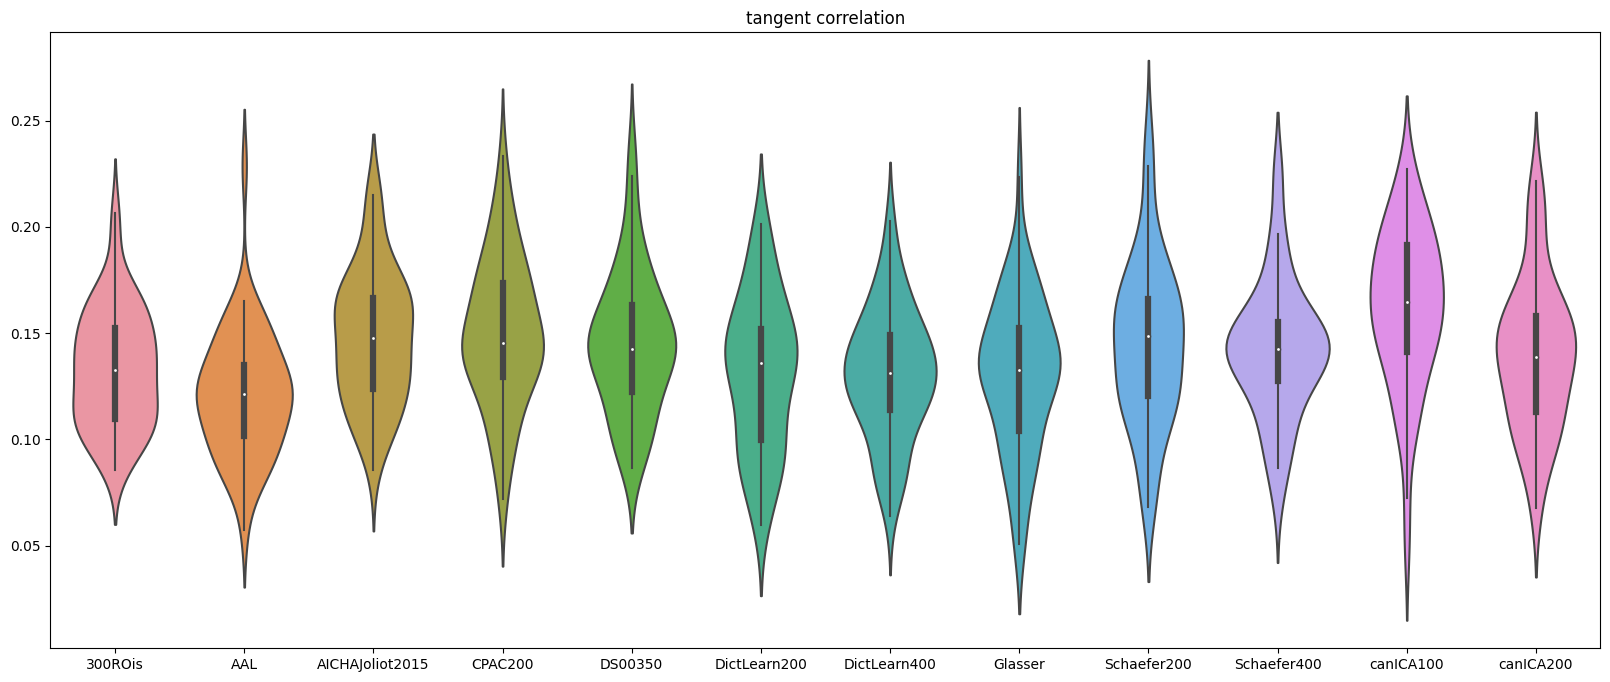

In [120]:
tang_df.columns = [s.split('-')[-1].split('.')[0] for s in tangent_paths_resutls]
tang_df_alphabetical = tang_df.reindex(sorted(tang_df.columns),axis = 1)
plt.figure(figsize=(20,8))
sns.violinplot(data = tang_df_alphabetical)
plt.title('tangent correlation')

plt.savefig(path + 'results/plots/tangent_corr_relevant_atlases.pdf')
plt.show()



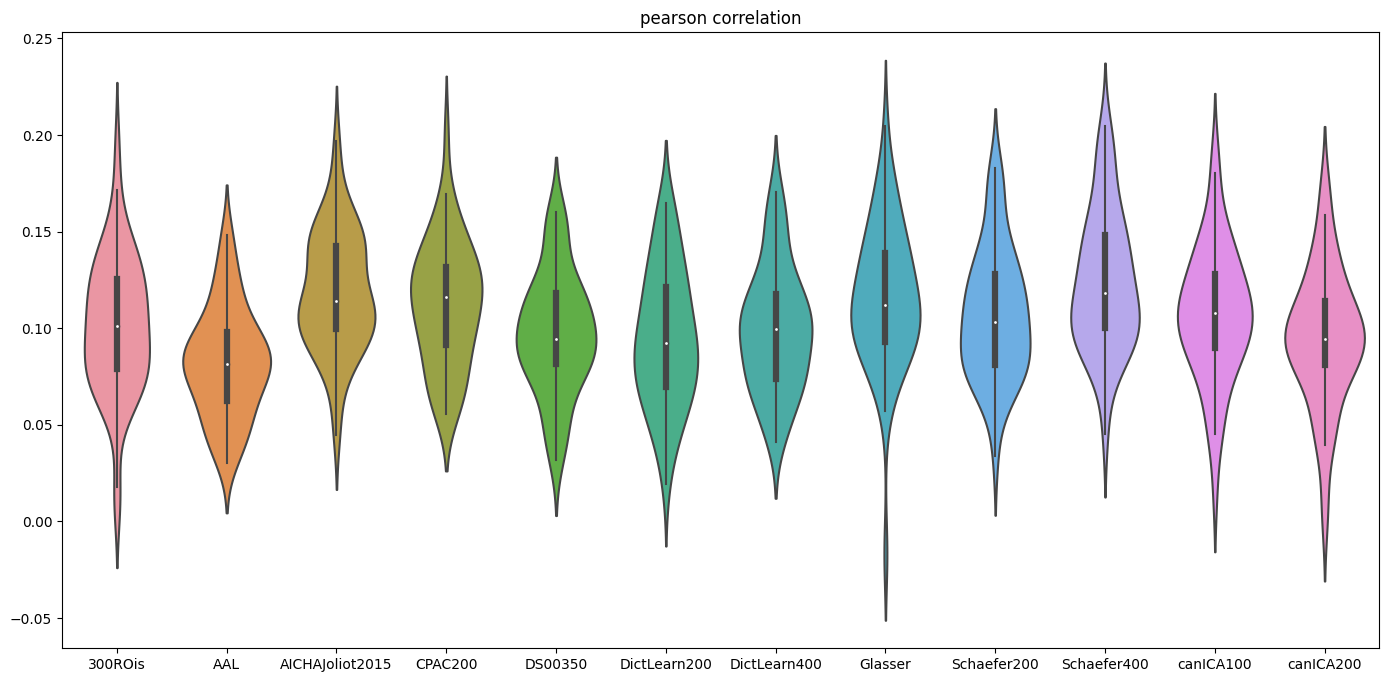

300ROis            0.100926
AAL                0.081438
AICHAJoliot2015    0.114194
CPAC200            0.116092
DS00350            0.094311
DictLearn200       0.092247
DictLearn400       0.099630
Glasser            0.111956
Schaefer200        0.103162
Schaefer400        0.118431
canICA100          0.107921
canICA200          0.094605
dtype: float64
300ROis            0.132485
AAL                0.121122
AICHAJoliot2015    0.147874
CPAC200            0.145250
DS00350            0.142675
DictLearn200       0.136063
DictLearn400       0.131229
Glasser            0.132734
Schaefer200        0.148422
Schaefer400        0.142678
canICA100          0.164812
canICA200          0.138861
dtype: float64


In [126]:
pear_df.columns = [s.split('-')[-1].split('.')[0] for s in pearson_paths_resutls]
pear_df_alphabetical = pear_df.reindex(sorted(pear_df.columns),axis = 1)

plt.figure(figsize=(17,8))
sns.violinplot(data = pear_df_alphabetical)

plt.title('pearson correlation')
#plt.savefig(path + 'results/plots/pearson_corr_relevant_atlases.pdf')
plt.show()
print(pear_df_alphabetical.median())
print(tang_df_alphabetical.median())

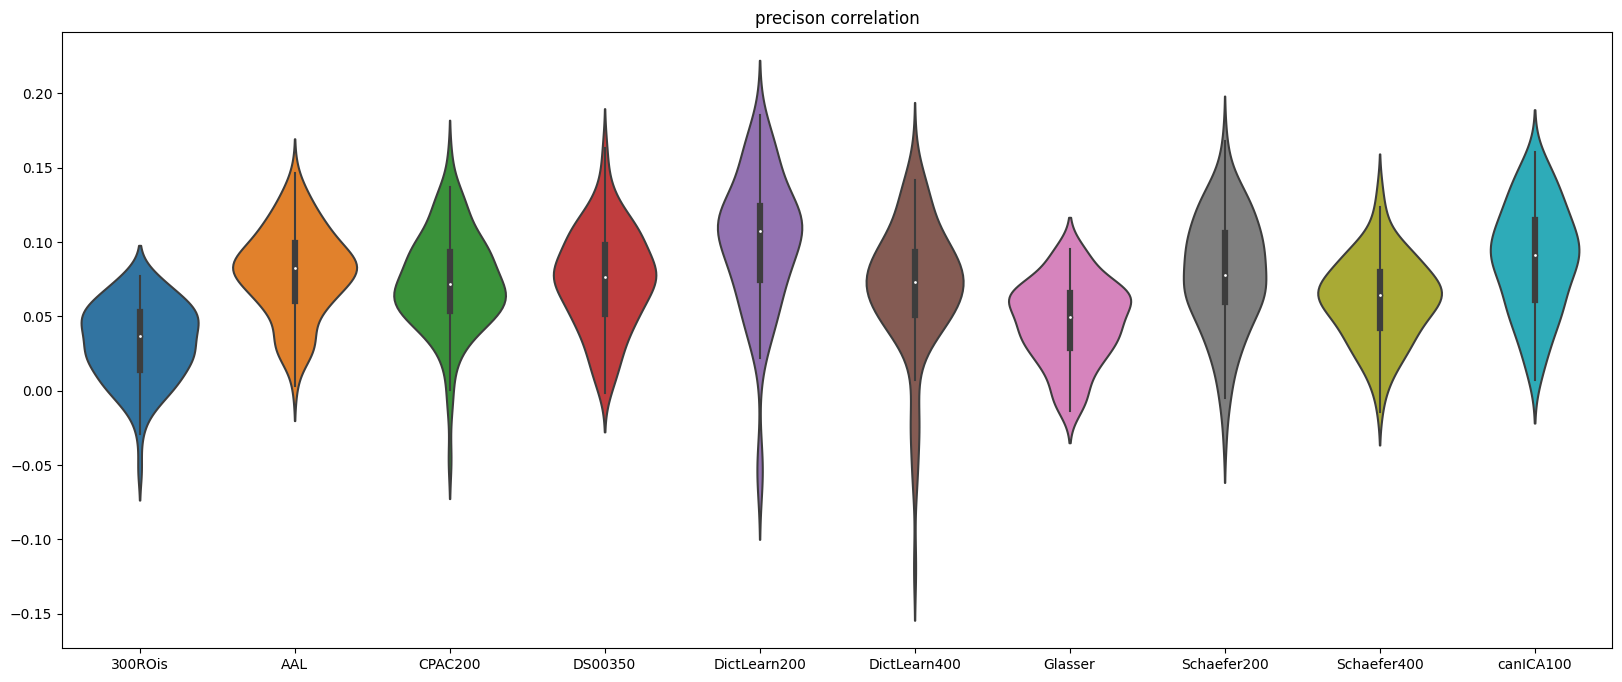

In [135]:


prc_df.columns = [s.split('-')[-1].split('.')[0] for s in prec_paths_results]
prc_df_a = prc_df.reindex(sorted(prc_df.columns),axis = 1)
plt.figure(figsize=(20,8))
sns.violinplot(data = prc_df_a)
plt.title('precison correlation')

plt.savefig(path + 'results/plots/precision_corr_relevant_atlases.pdf')
plt.show()
#

In [127]:
tangent_paths_resutls


['data/results/ridge_regression/tangent/ridge_results_newalpha_cor_tangent_atlas-DictLearn400.csv',
 'data/results/ridge_regression/tangent/ridge_results_newalpha_cor_tangent_atlas-AAL.csv',
 'data/results/ridge_regression/tangent/ridge_results_newalpha_cor_tangent_atlas-DS00350.csv',
 'data/results/ridge_regression/tangent/ridge_results_newalpha_cor_tangent_atlas-CPAC200.csv',
 'data/results/ridge_regression/tangent/ridge_results_newalpha_cor_tangent_atlas-canICA100.csv',
 'data/results/ridge_regression/tangent/ridge_results_newalpha_cor_tangent_atlas-canICA200.csv',
 'data/results/ridge_regression/tangent/ridge_results_newalpha_cor_tangent_atlas-Schaefer400.csv',
 'data/results/ridge_regression/tangent/ridge_results_newalpha_cor_tangent_atlas-300ROis.csv',
 'data/results/ridge_regression/tangent/ridge_results_newalpha_cor_tangent_atlas-DictLearn200.csv',
 'data/results/ridge_regression/tangent/ridge_results_newalpha_cor_tangent_atlas-Glasser.csv',
 'data/results/ridge_regression/tang

In [128]:
pearson_paths_resutls

['data/results/ridge_regression/pearson/ridge_results_cor_pearson_atlas-Glasser.csv',
 'data/results/ridge_regression/pearson/ridge_results_cor_pearson_atlas-Schaefer200.csv',
 'data/results/ridge_regression/pearson/ridge_results_cor_pearson_atlas-canICA100.csv',
 'data/results/ridge_regression/pearson/ridge_results_cor_pearson_atlas-AICHAJoliot2015.csv',
 'data/results/ridge_regression/pearson/ridge_results_cor_pearson_atlas-canICA200.csv',
 'data/results/ridge_regression/pearson/ridge_results_cor_pearson_atlas-DS00350.csv',
 'data/results/ridge_regression/pearson/ridge_results_cor_pearson_atlas-CPAC200.csv',
 'data/results/ridge_regression/pearson/ridge_results_cor_pearson_atlas-DictLearn400.csv',
 'data/results/ridge_regression/pearson/ridge_results_cor_pearson_atlas-Schaefer400.csv',
 'data/results/ridge_regression/pearson/ridge_results_cor_pearson_atlas-300ROis.csv',
 'data/results/ridge_regression/pearson/ridge_results_cor_pearson_atlas-DictLearn200.csv',
 'data/results/ridge_reg

In [137]:
tang_df_cor = pd.concat((pd.read_csv(f)['GCA_corr'] for f in tangent_paths_resutls),axis = 1, ignore_index=True)


In [177]:
pear_df.head()

,Glasser,Schaefer200,canICA100,AICHAJoliot2015,canICA200,DS00350,CPAC200,DictLearn400,Schaefer400,300ROis,DictLearn200,AAL
0,0.104533,0.110665,0.134887,0.113147,0.108509,0.089856,0.126180,0.090894,0.131423,0.077015,0.095859,0.089125
1,0.081416,0.095575,0.045404,0.100607,0.077757,0.082646,0.102038,0.070593,0.120410,0.106518,0.065514,0.066512
2,0.137870,0.124136,0.128137,0.112276,0.076173,0.084779,0.075797,0.076649,0.122899,0.124113,0.066322,0.080855
3,0.101744,0.066241,0.088149,0.103015,0.101716,0.050282,0.103375,0.072139,0.102928,0.067953,0.055277,0.040929
4,0.090923,0.064567,0.015888,0.057524,0.001215,0.031593,0.055715,0.072138,0.062593,0.067061,0.032638,0.051378


In [194]:
largest_tang = pd.DataFrame()
for k in range(tang_df.shape[1]):
    largest_tang[f'atlas{k}'] = tang_df.nlargest(n = 5, columns = k).reset_index()[k]
largest_tang.shape
largest_pear = pd.DataFrame()
for k in range(pear_df.shape[1]):
    largest_pear[f'atlas{k}'] = pear_df.nlargest(n = 5, columns = k).reset_index()[k]
largest_pear.shape

#prc_df = pd.concat((pd.read_csv(f)['GCA_var'] for f in prec_paths_results),axis = 1, ignore_index=True)
#prt_df 

largest_prc = pd.DataFrame()
for k in range(prc_df.shape[1]):
    largest_prc[f'atlas{k}'] = prc_df.nlargest(n = 5, columns = k).reset_index()[k]
largest_prc.shape
largest_prt = pd.DataFrame()
for k in range(prt_df.shape[1]):
    largest_prt[f'atlas{k}'] = prt_df.nlargest(n = 5, columns = k).reset_index()[k]
largest_prt.shape


(5, 12)

In [196]:
print(tang_df.shape,prt_df.shape)

(50, 12) (50, 12)


<Axes: >

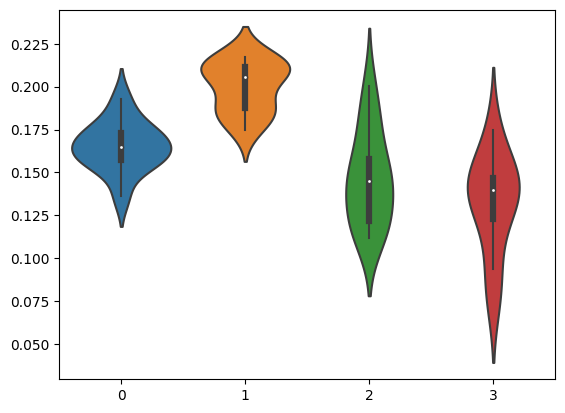

In [197]:
sns.violinplot(data = [largest_pear.mean(),largest_tang.mean(),largest_prt.mean(),largest_prc.mean()])

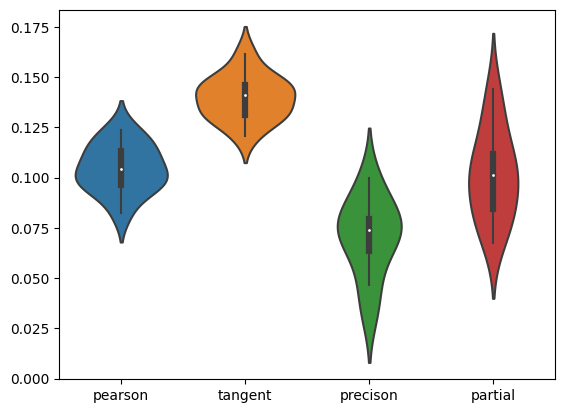

In [209]:
ax = sns.violinplot(data = [pear_df.mean(),tang_df.mean(),prc_df.mean(),prt_df.mean()])

ax.set_xticklabels(['pearson','tangent','precison','partial'])
ax.get_figure().savefig(path + 'results/plots/connectome_building_techiques.pdf')

False

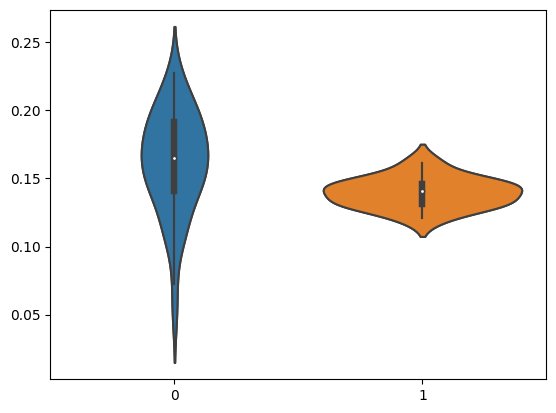

In [213]:
tang_df[tang_df.mean().idxmax()]

sns.violinplot(data = [tang_df[tang_df.mean().idxmax()],tang_df.mean()])

callable(sns.violinplot(data = [tang_df[tang_df.mean().idxmax()],tang_df.mean()])
)